In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
# Load the cleaned data
file_path = 'data/data_clean.csv'
data = pd.read_csv(file_path)

In [11]:
# Normalizing the features
feature_scaler = StandardScaler()
features = data[['robot_speed', 'layer_height', 'layer_width']]
features = feature_scaler.fit_transform(features)
targets = data[['extrusion_speed']]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

# Model definition
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linar'))  # Output layer

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error')

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

Epoch 1/50


I0000 00:00:1702614149.355040  250909 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


41/41 - 3s - loss: 0.4060 - val_loss: 0.4147 - 3s/epoch - 83ms/step
Epoch 2/50
41/41 - 1s - loss: 0.4106 - val_loss: 0.4646 - 601ms/epoch - 15ms/step
Epoch 3/50
41/41 - 1s - loss: 0.4089 - val_loss: 0.4570 - 621ms/epoch - 15ms/step
Epoch 4/50
41/41 - 1s - loss: 0.4048 - val_loss: 0.4105 - 620ms/epoch - 15ms/step
Epoch 5/50
41/41 - 1s - loss: 0.4000 - val_loss: 0.4099 - 545ms/epoch - 13ms/step
Epoch 6/50
41/41 - 1s - loss: 0.3977 - val_loss: 0.4424 - 547ms/epoch - 13ms/step
Epoch 7/50
41/41 - 1s - loss: 0.4027 - val_loss: 0.4078 - 549ms/epoch - 13ms/step
Epoch 8/50
41/41 - 0s - loss: 0.3915 - val_loss: 0.4052 - 499ms/epoch - 12ms/step
Epoch 9/50
41/41 - 1s - loss: 0.3882 - val_loss: 0.4025 - 530ms/epoch - 13ms/step
Epoch 10/50
41/41 - 1s - loss: 0.3894 - val_loss: 0.4097 - 506ms/epoch - 12ms/step
Epoch 11/50
41/41 - 1s - loss: 0.3823 - val_loss: 0.4524 - 502ms/epoch - 12ms/step
Epoch 12/50
41/41 - 0s - loss: 0.3970 - val_loss: 0.4126 - 487ms/epoch - 12ms/step
Epoch 13/50
41/41 - 1s - lo

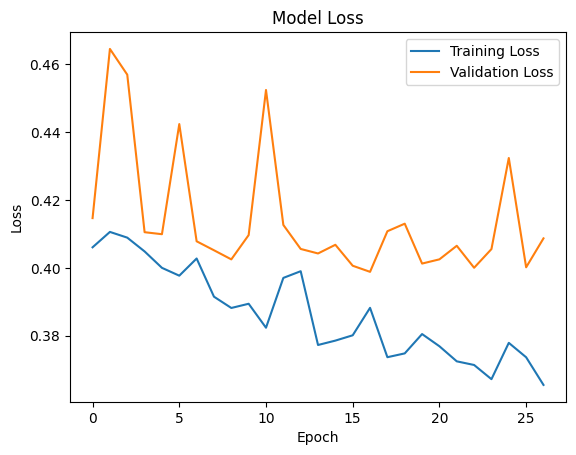

In [17]:
train_model = True

save_model = True
model_name = 'mycoprint_test'


if train_model:
    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=2, validation_split=0.2, callbacks=[early_stopping])
    
    if save_model:
        model.save(f'model/{model_name}.keras')

    # Plot training history
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()
else:
    from keras.saving import load_model
    model = load_model(f'model/{model_name}.keras')

In [13]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 9ms/step - loss: 0.5237


0.5236612558364868

In [14]:
robot_speed_test = np.arange(8,29)
layer_height_test = np.repeat(5, robot_speed_test.shape[0])
layer_width_test = np.repeat(8, robot_speed_test.shape[0])

test_data = pd.DataFrame({
    'robot_speed': robot_speed_test,
    'layer_height': layer_height_test,
    'layer_width': layer_width_test
})

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)

# Calculating MSE and MAE for Linear Regression Model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Calculating RMSE for both models
rmse = np.sqrt(mse)

# Printing the results
print("Test Split")
print("-----------")
print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("-----------")

y_pred = model.predict(features)

mse = mean_squared_error(targets, y_pred)
mae = mean_absolute_error(targets, y_pred)

print("Total")
print("-----------")
print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("-----------")

4/4 [==============================] - 0s 6ms/step
Test Split
-----------
MSE: 0.5236611491366456
MAE: 0.5729257366444805
RMSE: 0.7236443526599552
-----------
16/16 [==============================] - 0s 5ms/step
Total
-----------
MSE: 0.42667503942095714
MAE: 0.5354458184469313
RMSE: 0.7236443526599552
-----------


In [16]:
save_test = False


test_scaled = feature_scaler.transform(test_data)

pred_extrusion_speed = model.predict(test_scaled)
test_data["do_prediction"] = np.floor((pred_extrusion_speed-6)*10)
test_data["rpm_prediction"] = pred_extrusion_speed

if save_test:
    test_data.to_csv('validation_ann.csv', index=False)

test_data

1/1 [==============================] - 0s 42ms/step


,robot_speed,layer_height,layer_width,do_prediction,rpm_prediction
0,8,5,8,28.0,8.803656
1,9,5,8,29.0,8.958921
2,10,5,8,30.0,9.098879
3,11,5,8,32.0,9.247654
4,12,5,8,34.0,9.400264
5,13,5,8,35.0,9.552873
6,14,5,8,37.0,9.735774
7,15,5,8,40.0,10.005907
8,16,5,8,42.0,10.276039
9,17,5,8,45.0,10.560943
